In [2]:
# This script do p value correction for synonymous outputs
# Author Yiyun
import pandas as pd
from os.path import join, isdir, exists
from os import listdir, remove
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.cbook import boxplot_stats

In [3]:
nsyn_dir = '../mutsig_out/nsyn/out08262020'
syn_dir = '../mutsig_out/syn/out08262020'
cov_syn_dir = '../org_cov_maf'
cov_nsyn_dir = '../org_cov_maf'

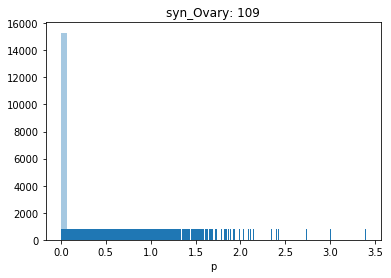

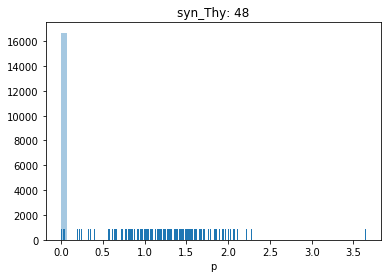

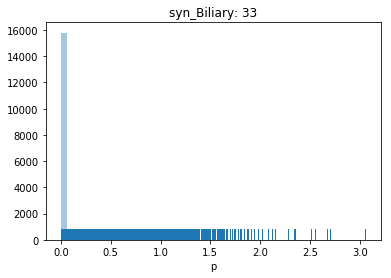

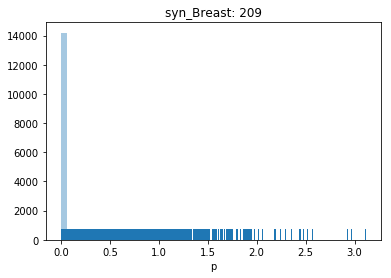

KeyboardInterrupt: 

In [16]:
# Synonymous p value distribution drop p value =1
for org in listdir(syn_dir):
    if '-' not in org:
        cov_f = join(cov_syn_dir,org,'merged_'+org+'.txt')
        df_cov = pd.read_csv(cov_f,sep = '\t', nrows =1)
        org_dir = join(syn_dir,org)
        for f in listdir(org_dir):
            if f.endswith('sig_genes.txt'):
                f_dir = join(org_dir,f)
                df_org = pd.read_csv(f_dir,sep = '\t', index_col=0)
                df_org.loc[df_org['p']==0, 'p'] = 1e-50
                df_p = -np.log10(df_org['p'].dropna())
                sns.distplot(df_p, bins=50, kde=False, rug=True).set_title('syn_'+org+': '+str(len(df_cov.columns)-3))
                plt.show()

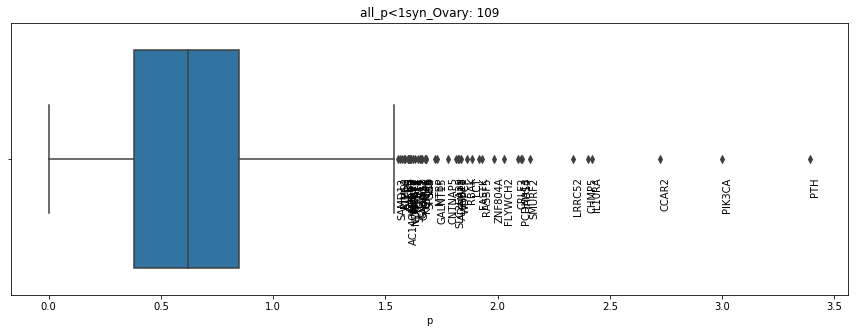

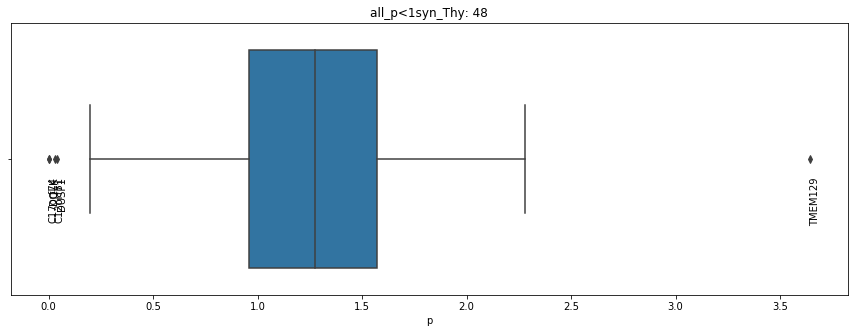

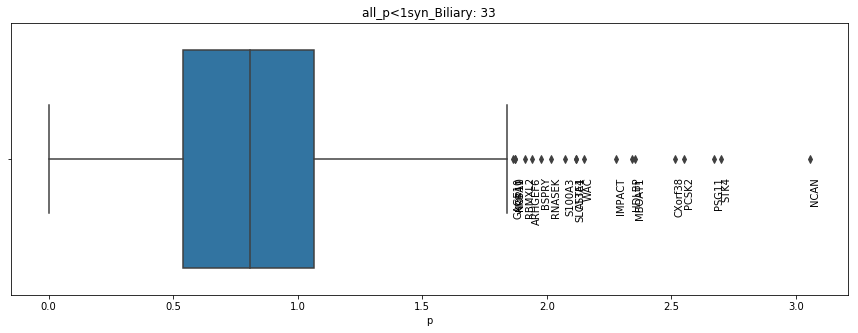

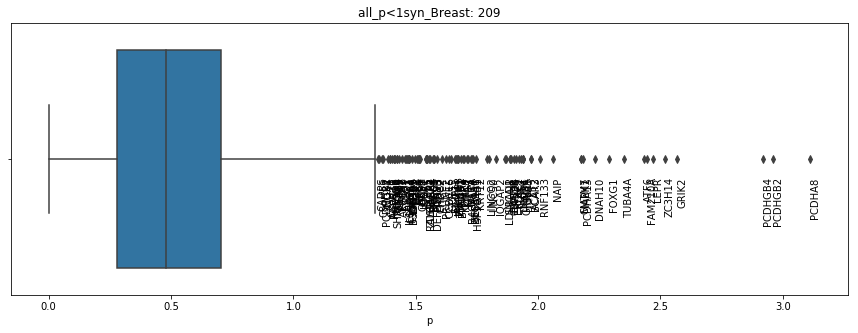

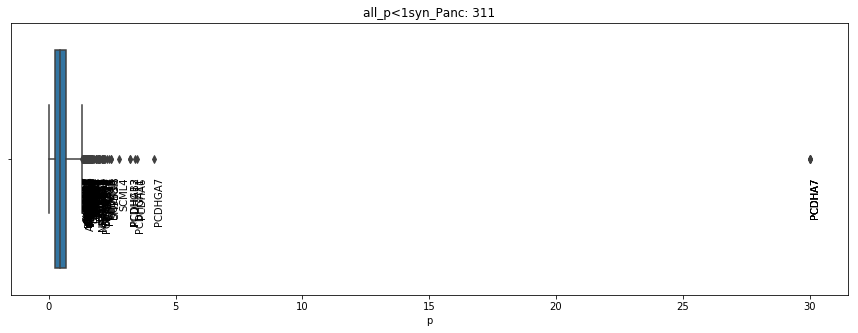

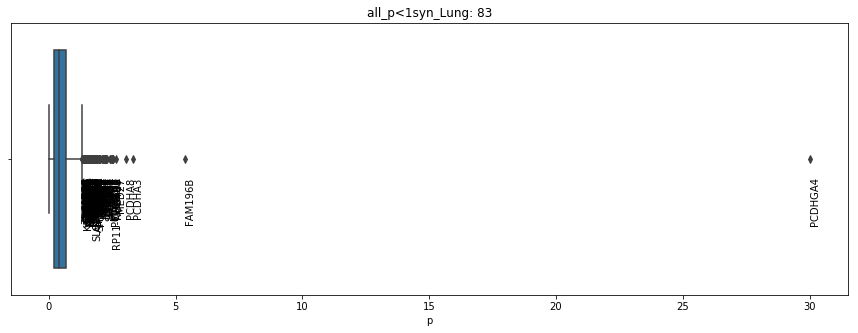

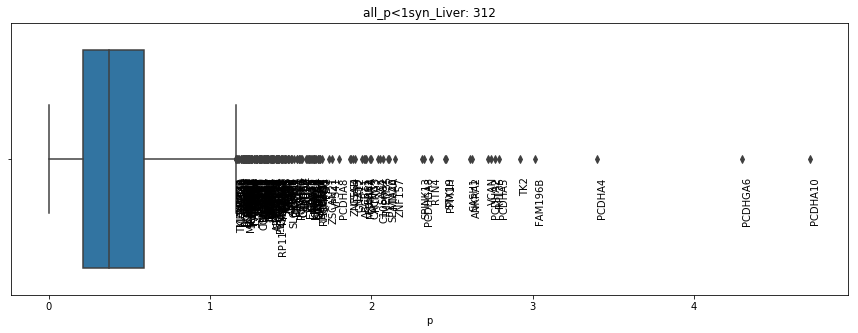

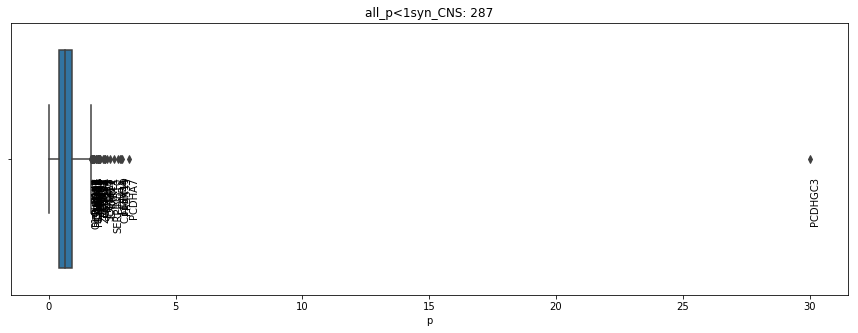

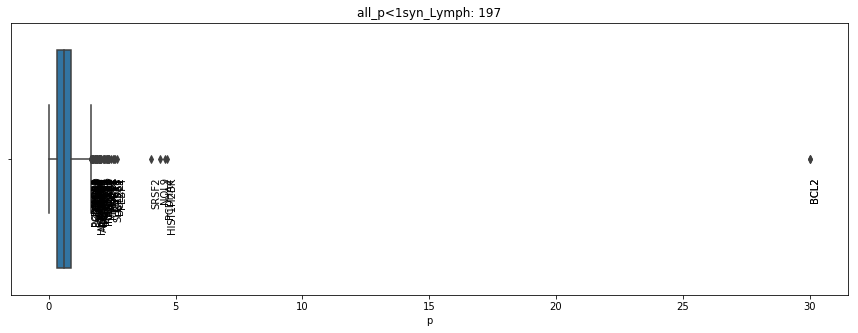

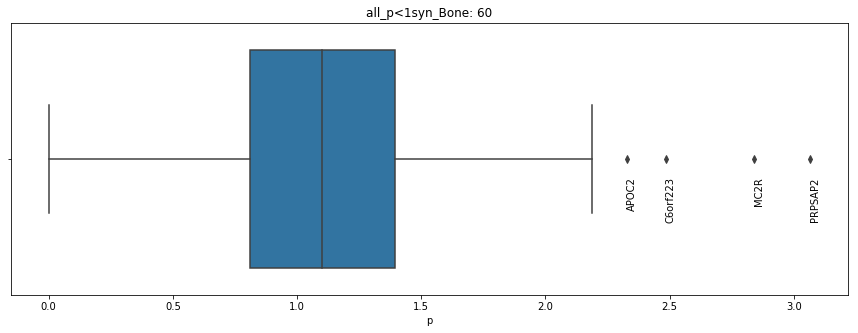

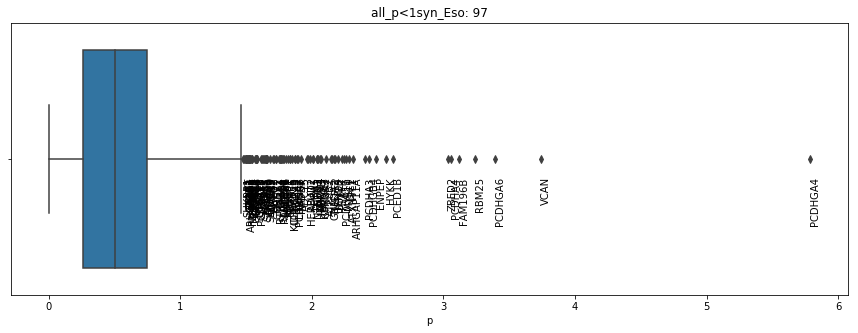

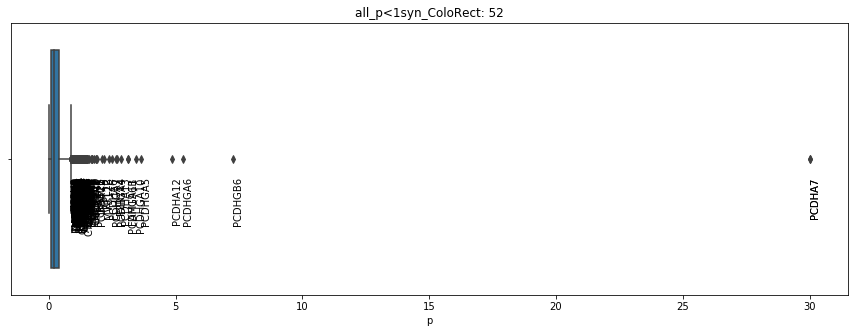

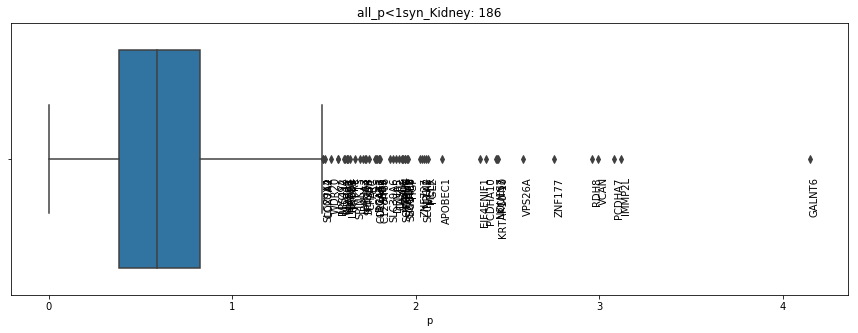

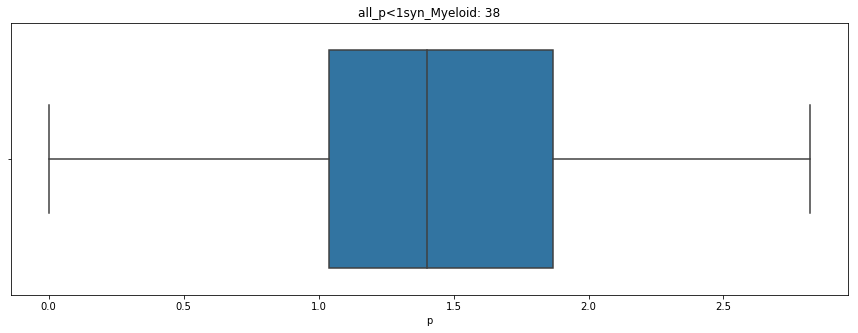

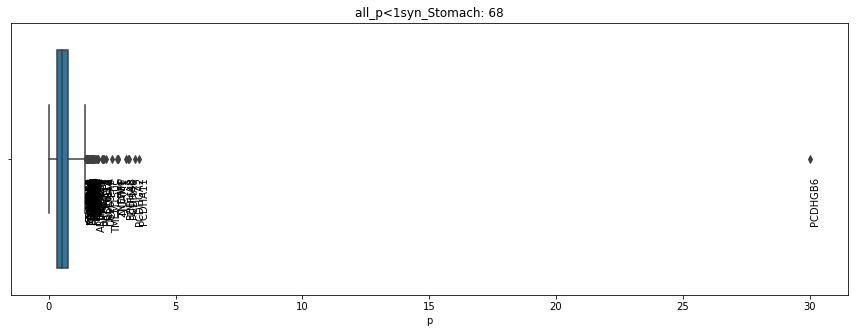

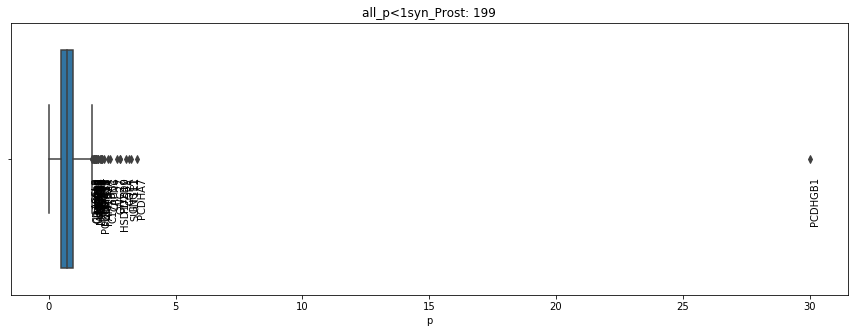

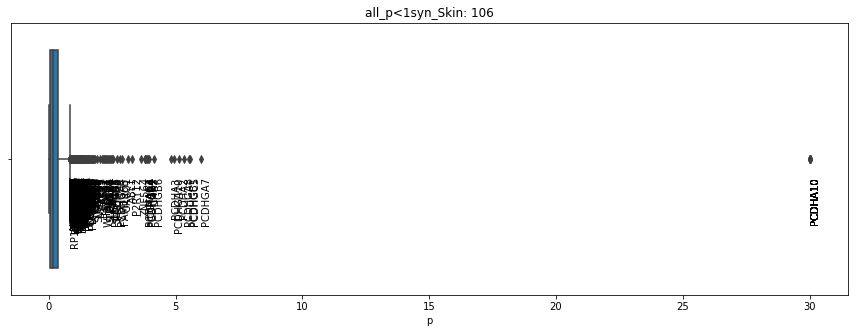

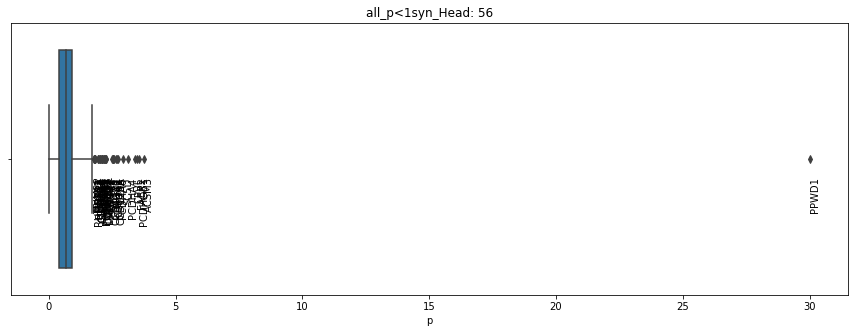

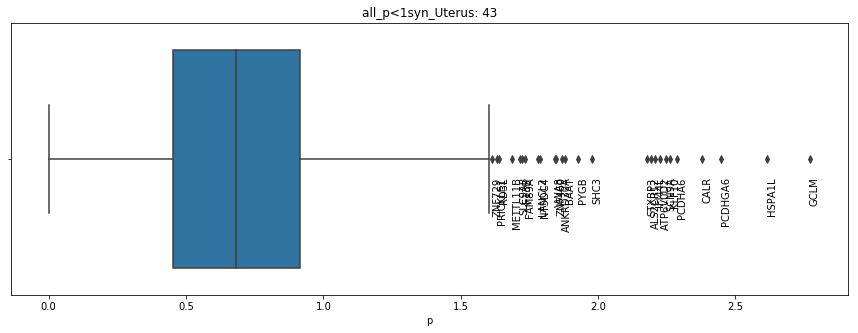

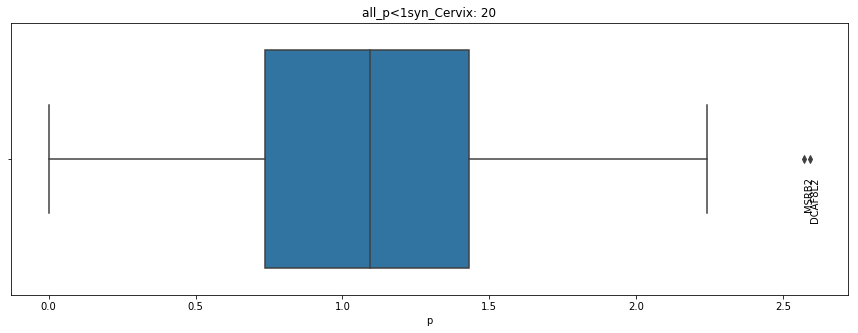

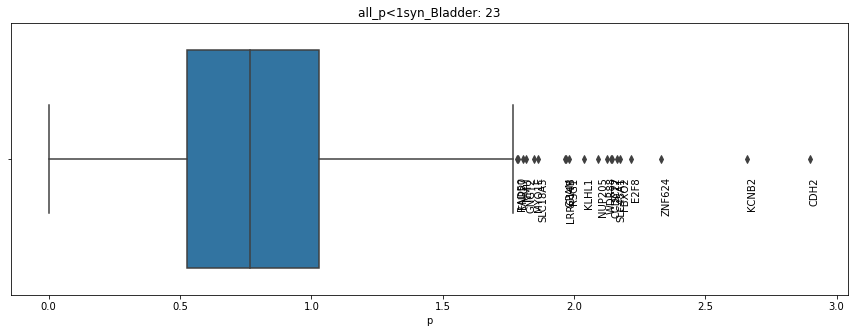

In [7]:
# Synonymous p value distribution drop p value =1
for org in listdir(syn_dir):
    if '-' not in org:
        cov_f = join(cov_syn_dir,org,'merged_'+org+'.txt')
        df_cov = pd.read_csv(cov_f,sep = '\t', nrows =1)
        org_dir = join(syn_dir,org)
        for f in listdir(org_dir):
            if f.endswith('sig_genes.txt'):
                f_dir = join(org_dir,f)
                df_org = pd.read_csv(f_dir,sep = '\t', index_col=0)
#                 df_org = df_org[df_org['n_noncoding']>=5]
                df_org.loc[df_org['p']==0, 'p'] = 1e-30
                df_p = -np.log10(df_org[df_org['p']<1]['p'])
                
                #plot boxplot
                f, ax = plt.subplots(figsize=(15,5))
                ax = sns.boxplot(df_p)
                ax.set_title('all_p<1'+'syn_'+org+': '+str(len(df_cov.columns)-3))
                
                #label outliers
                outliers = [y for stat in boxplot_stats(df_p) for y in stat['fliers']]
                o_df = pd.DataFrame(columns = ['gene','pval'])
                for outlier in outliers:
                    idx = df_org[-np.log10(df_org['p']) == outlier].index.values[0]
                    tmp = pd.DataFrame([[idx,outlier]],columns = ['gene','pval'] )
                    o_df = o_df.append(tmp,ignore_index=True)

                for row in o_df.iterrows():
                    ax.annotate(row[1]['gene'], xy=(row[1]['pval'],0.1), xytext=(0,1), textcoords='offset points', fontsize=10, rotation=90)

                #sns.distplot(df_p, bins=50, kde=False, rug=False).set_title('syn_'+org+': '+str(len(df_cov.columns)-3))
                plt.show()

In [68]:
ax = sns.boxplot(df_p)

outliers = [y for stat in boxplot_stats(df_p) for y in stat['fliers']]
o_df = pd.DataFrame(columns = ['gene','pval'])
for outlier in outliers:
    idx = df_org[-np.log10(df_org['p']) == outlier].index.values[0]
    tmp = pd.DataFrame([[idx,outlier]],columns = ['gene','pval'] )
    o_df = o_df.append(tmp,ignore_index=True)

for row in o_df.iterrows():
    ax.annotate(row[1]['gene'], xy=(row[1]['pval'],0.5), xytext=(2,2), textcoords='offset points', fontsize=14)

plt.show()

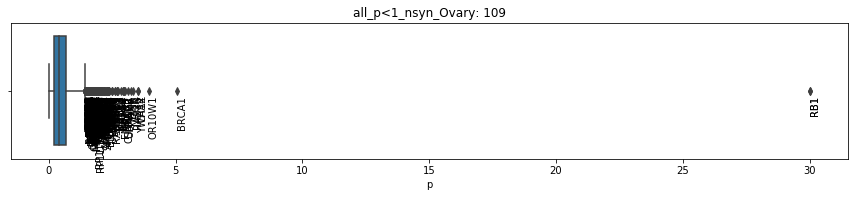

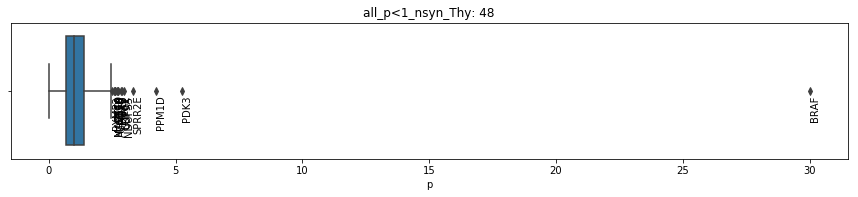

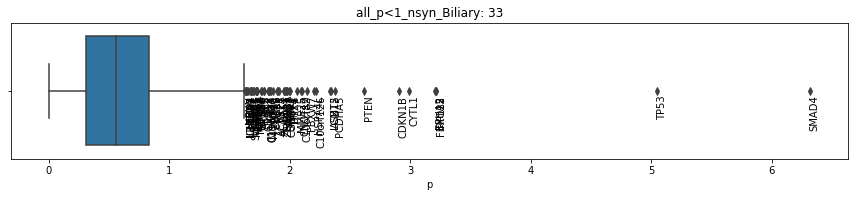

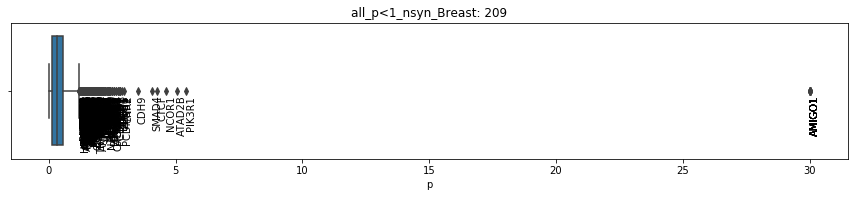

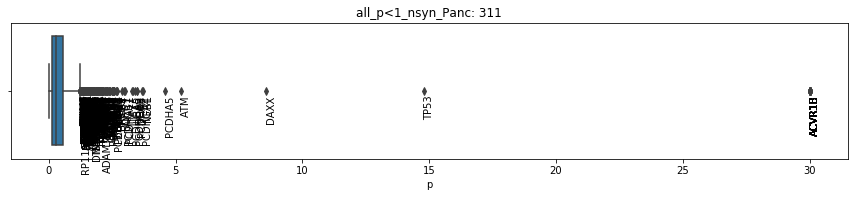

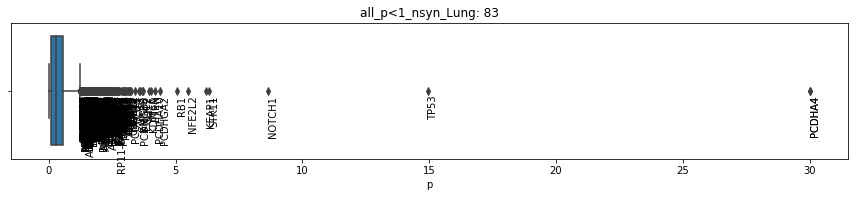

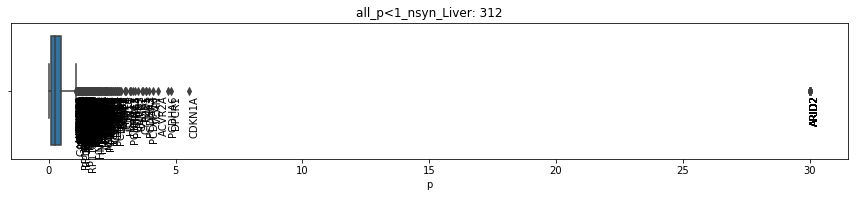

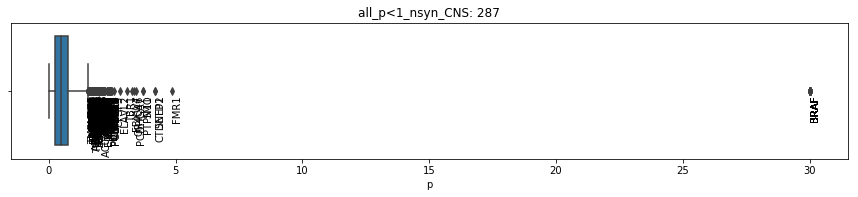

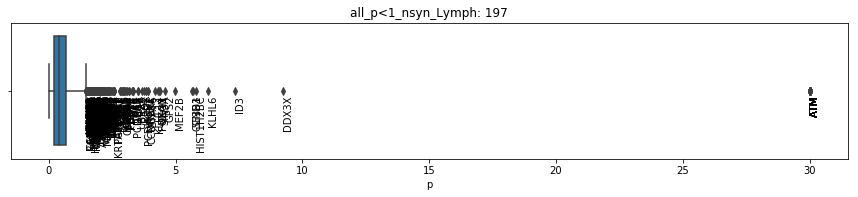

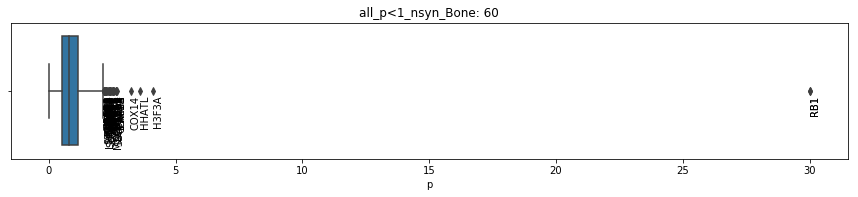

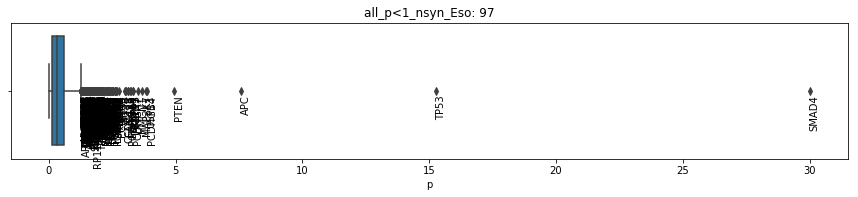

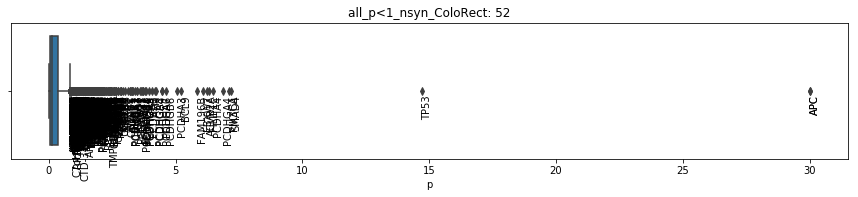

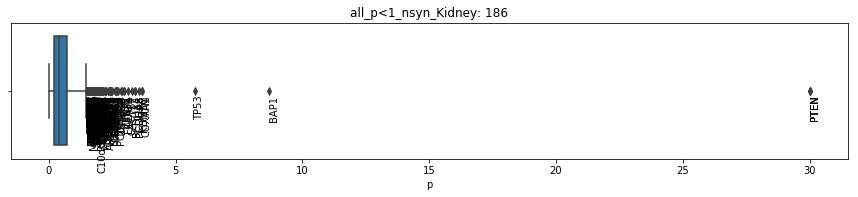

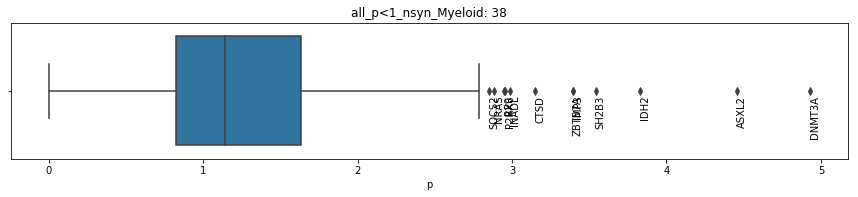

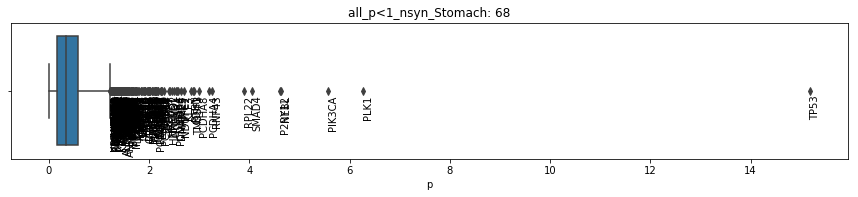

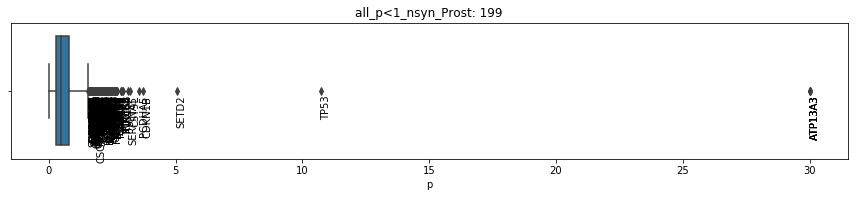

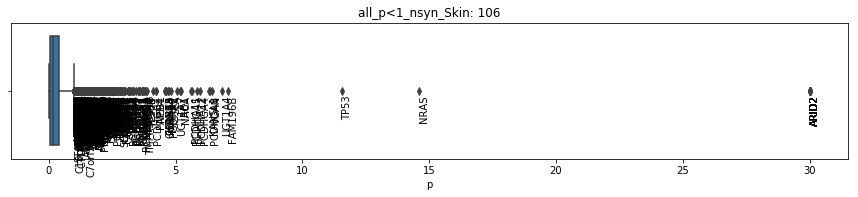

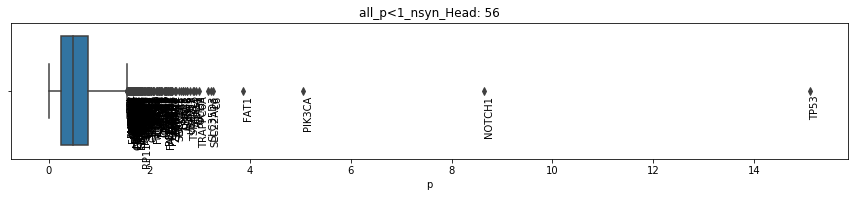

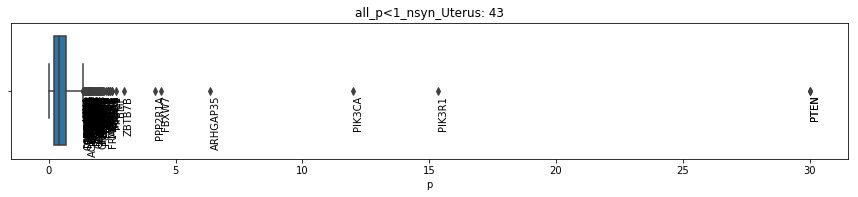

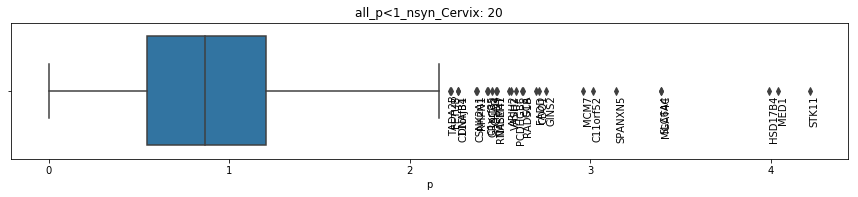

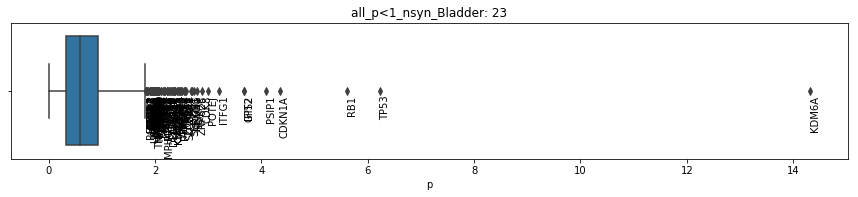

In [11]:
# nonSynonymous p value distribution drop p value =1
for org in listdir(nsyn_dir):
    if '-' not in org:
        cov_f = join(cov_nsyn_dir,org,'merged_'+org+'.txt')
        df_cov = pd.read_csv(cov_f,sep = '\t', nrows =1)
        org_dir = join(nsyn_dir,org)
        for f in listdir(org_dir):
            if f.endswith('sig_genes.txt'):
                f_dir = join(org_dir,f)
                df_org = pd.read_csv(f_dir,sep = '\t', index_col=0)
#                 df_org = df_org[df_org['n_noncoding']>=5]
                df_org.loc[df_org['p']==0, 'p'] = 1e-30
                df_p = -np.log10(df_org[df_org['p']<1]['p'])
                
                #plot boxplot
                f, ax = plt.subplots(figsize=(15,2.5))
                ax = sns.boxplot(df_p)
                ax.set_title('all_p<1_nsyn_'+org+': '+str(len(df_cov.columns)-3))
                
                #label outliers
                outliers = [y for stat in boxplot_stats(df_p) for y in stat['fliers']]
                o_df = pd.DataFrame(columns = ['gene','pval'])
                for outlier in outliers:
                    idx = df_org[-np.log10(df_org['p']) == outlier].index.values[0]
                    tmp = pd.DataFrame([[idx,outlier]],columns = ['gene','pval'] )
                    o_df = o_df.append(tmp,ignore_index=True)

                for row in o_df.iterrows():
                    ax.annotate(row[1]['gene'], xy=(row[1]['pval'],0.1), xytext=(0,1), textcoords='offset points', fontsize=10, rotation=90)

                #sns.distplot(df_p, bins=50, kde=False, rug=False).set_title('syn_'+org+': '+str(len(df_cov.columns)-3))
                plt.show()